## Problem 1 - Adult Dataset

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
use_cuda = torch.cuda.is_available()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Transformations on the dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
#Loading the dataset numpy files
data=np.load("data.npy")
label=np.load("labels.npy")
print("Length of data and label in dataset: ")
print(len(data),len(label))

Length of data and label in dataset: 
45222 45222


In [4]:
#Splitting the dataset into trainign and testing: The split is the default split of: 75% (training) - 25% (testing)
x_train, x_test, y_train, y_test = train_test_split(data, label)
print("np.array(x_train).shape, np.array(y_train).shape, np.array(x_test).shape, np.array(y_test).shape: ")
print(np.array(x_train).shape, np.array(y_train).shape, np.array(x_test).shape, np.array(y_test).shape)

np.array(x_train).shape, np.array(y_train).shape, np.array(x_test).shape, np.array(y_test).shape: 
(33916, 67) (33916,) (11306, 67) (11306,)


In [5]:
#Loads the images using loader class
#Abstract clss representing a dataset
class ImgLoader(Dataset):
    def __init__(self, x, y,iscuda=False, transform=None):
        self.x = np.array(x)
        self.y = np.array(y)
        self.transform=transform
        self.cuda = iscuda

#supports indexing
    def __getitem__(self, index):
        x_val = self.x[index]
        y_val = torch.from_numpy(np.array([self.y[index]]))
        if self.cuda:
            x_val = x_val.cuda()
            y_val = y_val.cuda()
        return x_val, y_val

#returns size of dataset
    def __len__(self):
        return len(self.x)

In [6]:
#Checks for whether cuda is available so as to run on GPU or not
use_cuda = torch.cuda.is_available()
#img_loadertrain has the training images; on which transformations have been performed
img_loadertrain = ImgLoader(x_train, y_train, use_cuda, transform = transform)
#Training data loaded into the Network having batch size = 100
trainloader = DataLoader(img_loadertrain, batch_size = 100, shuffle=True, num_workers = 4)

#img_loadertest has the testing images; on which transformations have been performed
img_loadertest = ImgLoader(x_test, y_test, use_cuda, transform = transform)
#Testing data loaded into the Network having batch size = 100
testloader = DataLoader(img_loadertest, batch_size = 100, shuffle = True, num_workers = 4)

In [7]:
#Network class is defined
class ConvClassifier(nn.Module):
    def __init__(self):
        super(ConvClassifier, self).__init__()
        self.fc1 = nn.Linear(67, 200, bias=True)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.sigmoid(x)

In [8]:
#Eval function called to calculate the accuracy of model
def eval(model, xdata, ydata):
    net.train(False)
    count = 0
    for x,y in zip(xdata,ydata):
        x = torch.from_numpy(np.array([x])).type(torch.float32)
        if use_cuda:
            x = x.cuda()

        out = model(Variable(x))
        #for binary classification, if predicted probability is more than 0.5, label as 1, else 0
        label = 1 if out.data.cpu().numpy() > 0.5 else 0
        if y == label:
            count += 1
    accuracy = count * 1.0 / len(xdata)
    return accuracy

In [26]:
def predi(model, x_train, y_train):
    i=0
    predasmore = 0
    predasless = 0
    for (x,y) in zip(x_train,y_train):
        x = torch.from_numpy(np.array([x])).type(torch.float32)
        if use_cuda:
            x = x.cuda()

        out = model(Variable(x))
        #for binary classification, if predicted probability is more than 0.5, label as 1, else 0
        label = 1 if out.data.cpu().numpy() > 0.5 else 0
        if(y != label):
            if(y == 1):
                predasmore+=1
            else:
                predasless+=1
            print("index prediction actual")
            print(i+1, label, y)
        i = i+1
    print("Predicted as more but actually less than 50K: ", predasmore)
    print("Predicted as less but actually more than 50K: ", predasless)

In [27]:
predi(net, x_train, y_train)

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


index prediction actual
3 0 1
index prediction actual
5 1 0
index prediction actual
13 1 0
index prediction actual
17 1 0
index prediction actual
25 0 1
index prediction actual
26 1 0
index prediction actual
32 1 0
index prediction actual
37 1 0
index prediction actual
38 1 0
index prediction actual
40 1 0
index prediction actual
45 1 0
index prediction actual
68 0 1
index prediction actual
77 0 1
index prediction actual
90 1 0
index prediction actual
104 1 0
index prediction actual
119 0 1
index prediction actual
123 1 0
index prediction actual
124 1 0
index prediction actual
136 0 1
index prediction actual
137 1 0
index prediction actual
147 1 0
index prediction actual
154 0 1
index prediction actual
158 1 0
index prediction actual
160 1 0
index prediction actual
173 0 1
index prediction actual
175 1 0
index prediction actual
180 1 0
index prediction actual
188 1 0
index prediction actual
191 1 0
index prediction actual
204 0 1
index prediction actual
205 0 1
index prediction actual


index prediction actual
2573 1 0
index prediction actual
2574 1 0
index prediction actual
2586 1 0
index prediction actual
2590 1 0
index prediction actual
2591 1 0
index prediction actual
2598 1 0
index prediction actual
2600 1 0
index prediction actual
2618 1 0
index prediction actual
2631 1 0
index prediction actual
2646 0 1
index prediction actual
2648 1 0
index prediction actual
2649 0 1
index prediction actual
2656 1 0
index prediction actual
2660 1 0
index prediction actual
2674 1 0
index prediction actual
2678 0 1
index prediction actual
2687 0 1
index prediction actual
2691 1 0
index prediction actual
2700 1 0
index prediction actual
2715 1 0
index prediction actual
2720 0 1
index prediction actual
2727 1 0
index prediction actual
2729 1 0
index prediction actual
2743 1 0
index prediction actual
2744 1 0
index prediction actual
2746 0 1
index prediction actual
2747 0 1
index prediction actual
2752 1 0
index prediction actual
2755 0 1
index prediction actual
2759 0 1
index pred

index prediction actual
4968 1 0
index prediction actual
4977 1 0
index prediction actual
4979 1 0
index prediction actual
4980 1 0
index prediction actual
4988 1 0
index prediction actual
4989 1 0
index prediction actual
4990 1 0
index prediction actual
5000 1 0
index prediction actual
5002 1 0
index prediction actual
5004 1 0
index prediction actual
5016 0 1
index prediction actual
5018 0 1
index prediction actual
5020 0 1
index prediction actual
5025 1 0
index prediction actual
5050 1 0
index prediction actual
5059 1 0
index prediction actual
5088 1 0
index prediction actual
5089 1 0
index prediction actual
5111 1 0
index prediction actual
5123 1 0
index prediction actual
5127 1 0
index prediction actual
5132 1 0
index prediction actual
5135 1 0
index prediction actual
5144 1 0
index prediction actual
5160 0 1
index prediction actual
5167 1 0
index prediction actual
5171 1 0
index prediction actual
5173 0 1
index prediction actual
5178 1 0
index prediction actual
5179 1 0
index pred

index prediction actual
7134 1 0
index prediction actual
7135 1 0
index prediction actual
7136 1 0
index prediction actual
7140 1 0
index prediction actual
7152 1 0
index prediction actual
7163 1 0
index prediction actual
7167 1 0
index prediction actual
7172 1 0
index prediction actual
7177 1 0
index prediction actual
7183 1 0
index prediction actual
7190 0 1
index prediction actual
7197 1 0
index prediction actual
7198 1 0
index prediction actual
7212 1 0
index prediction actual
7218 1 0
index prediction actual
7219 0 1
index prediction actual
7226 0 1
index prediction actual
7228 1 0
index prediction actual
7231 1 0
index prediction actual
7234 0 1
index prediction actual
7236 1 0
index prediction actual
7241 1 0
index prediction actual
7243 0 1
index prediction actual
7255 1 0
index prediction actual
7258 0 1
index prediction actual
7260 1 0
index prediction actual
7263 1 0
index prediction actual
7273 1 0
index prediction actual
7274 1 0
index prediction actual
7278 0 1
index pred

index prediction actual
9419 1 0
index prediction actual
9421 0 1
index prediction actual
9438 1 0
index prediction actual
9440 0 1
index prediction actual
9442 1 0
index prediction actual
9453 0 1
index prediction actual
9455 1 0
index prediction actual
9457 1 0
index prediction actual
9478 0 1
index prediction actual
9485 1 0
index prediction actual
9486 0 1
index prediction actual
9487 1 0
index prediction actual
9492 1 0
index prediction actual
9495 1 0
index prediction actual
9520 1 0
index prediction actual
9524 1 0
index prediction actual
9544 0 1
index prediction actual
9547 1 0
index prediction actual
9549 1 0
index prediction actual
9557 1 0
index prediction actual
9558 1 0
index prediction actual
9561 1 0
index prediction actual
9563 1 0
index prediction actual
9567 1 0
index prediction actual
9568 0 1
index prediction actual
9589 0 1
index prediction actual
9595 1 0
index prediction actual
9602 1 0
index prediction actual
9607 0 1
index prediction actual
9608 0 1
index pred

index prediction actual
11759 1 0
index prediction actual
11762 1 0
index prediction actual
11763 0 1
index prediction actual
11772 0 1
index prediction actual
11790 1 0
index prediction actual
11791 0 1
index prediction actual
11798 1 0
index prediction actual
11802 0 1
index prediction actual
11819 1 0
index prediction actual
11823 0 1
index prediction actual
11836 1 0
index prediction actual
11841 1 0
index prediction actual
11844 1 0
index prediction actual
11866 0 1
index prediction actual
11874 0 1
index prediction actual
11887 1 0
index prediction actual
11892 1 0
index prediction actual
11893 1 0
index prediction actual
11896 1 0
index prediction actual
11908 1 0
index prediction actual
11909 0 1
index prediction actual
11911 0 1
index prediction actual
11916 0 1
index prediction actual
11936 1 0
index prediction actual
11940 1 0
index prediction actual
11946 1 0
index prediction actual
11948 0 1
index prediction actual
11960 1 0
index prediction actual
11961 1 0
index predicti

index prediction actual
14059 0 1
index prediction actual
14064 1 0
index prediction actual
14065 1 0
index prediction actual
14066 1 0
index prediction actual
14067 1 0
index prediction actual
14069 0 1
index prediction actual
14073 1 0
index prediction actual
14074 0 1
index prediction actual
14078 1 0
index prediction actual
14089 1 0
index prediction actual
14099 1 0
index prediction actual
14122 0 1
index prediction actual
14125 1 0
index prediction actual
14131 1 0
index prediction actual
14132 1 0
index prediction actual
14142 1 0
index prediction actual
14143 1 0
index prediction actual
14146 1 0
index prediction actual
14155 1 0
index prediction actual
14157 0 1
index prediction actual
14164 1 0
index prediction actual
14177 1 0
index prediction actual
14179 0 1
index prediction actual
14181 1 0
index prediction actual
14192 1 0
index prediction actual
14194 0 1
index prediction actual
14198 1 0
index prediction actual
14203 1 0
index prediction actual
14218 1 0
index predicti

index prediction actual
16425 1 0
index prediction actual
16431 1 0
index prediction actual
16442 0 1
index prediction actual
16455 0 1
index prediction actual
16456 1 0
index prediction actual
16461 1 0
index prediction actual
16471 1 0
index prediction actual
16473 1 0
index prediction actual
16514 1 0
index prediction actual
16544 0 1
index prediction actual
16554 1 0
index prediction actual
16555 0 1
index prediction actual
16575 1 0
index prediction actual
16579 0 1
index prediction actual
16581 0 1
index prediction actual
16587 1 0
index prediction actual
16610 1 0
index prediction actual
16612 1 0
index prediction actual
16615 1 0
index prediction actual
16620 1 0
index prediction actual
16630 1 0
index prediction actual
16631 1 0
index prediction actual
16633 1 0
index prediction actual
16634 1 0
index prediction actual
16638 0 1
index prediction actual
16639 1 0
index prediction actual
16647 1 0
index prediction actual
16659 1 0
index prediction actual
16663 1 0
index predicti

index prediction actual
18843 1 0
index prediction actual
18847 1 0
index prediction actual
18854 1 0
index prediction actual
18856 1 0
index prediction actual
18867 1 0
index prediction actual
18880 1 0
index prediction actual
18885 1 0
index prediction actual
18887 1 0
index prediction actual
18898 1 0
index prediction actual
18912 1 0
index prediction actual
18926 0 1
index prediction actual
18943 1 0
index prediction actual
18949 1 0
index prediction actual
18955 1 0
index prediction actual
18963 0 1
index prediction actual
18974 0 1
index prediction actual
18976 1 0
index prediction actual
18978 1 0
index prediction actual
18979 1 0
index prediction actual
18982 0 1
index prediction actual
18991 0 1
index prediction actual
18999 1 0
index prediction actual
19001 0 1
index prediction actual
19004 1 0
index prediction actual
19005 1 0
index prediction actual
19014 1 0
index prediction actual
19018 1 0
index prediction actual
19021 1 0
index prediction actual
19030 0 1
index predicti

index prediction actual
20926 0 1
index prediction actual
20944 1 0
index prediction actual
20945 1 0
index prediction actual
20946 1 0
index prediction actual
20952 1 0
index prediction actual
20959 1 0
index prediction actual
20963 1 0
index prediction actual
20969 1 0
index prediction actual
20970 1 0
index prediction actual
20972 1 0
index prediction actual
20973 1 0
index prediction actual
20982 1 0
index prediction actual
20988 0 1
index prediction actual
20990 1 0
index prediction actual
20991 0 1
index prediction actual
21001 1 0
index prediction actual
21002 1 0
index prediction actual
21018 1 0
index prediction actual
21026 1 0
index prediction actual
21033 1 0
index prediction actual
21034 1 0
index prediction actual
21049 1 0
index prediction actual
21050 1 0
index prediction actual
21052 0 1
index prediction actual
21065 1 0
index prediction actual
21075 1 0
index prediction actual
21081 1 0
index prediction actual
21086 1 0
index prediction actual
21096 1 0
index predicti

index prediction actual
22812 0 1
index prediction actual
22817 0 1
index prediction actual
22824 0 1
index prediction actual
22827 1 0
index prediction actual
22849 1 0
index prediction actual
22853 1 0
index prediction actual
22866 1 0
index prediction actual
22868 1 0
index prediction actual
22879 1 0
index prediction actual
22898 0 1
index prediction actual
22911 1 0
index prediction actual
22957 1 0
index prediction actual
22968 1 0
index prediction actual
22969 0 1
index prediction actual
22971 1 0
index prediction actual
22977 0 1
index prediction actual
22979 1 0
index prediction actual
22988 1 0
index prediction actual
22990 0 1
index prediction actual
22996 1 0
index prediction actual
22999 0 1
index prediction actual
23029 1 0
index prediction actual
23031 0 1
index prediction actual
23038 1 0
index prediction actual
23039 1 0
index prediction actual
23040 1 0
index prediction actual
23042 1 0
index prediction actual
23044 1 0
index prediction actual
23047 1 0
index predicti

index prediction actual
24817 1 0
index prediction actual
24820 1 0
index prediction actual
24822 0 1
index prediction actual
24824 0 1
index prediction actual
24828 1 0
index prediction actual
24839 0 1
index prediction actual
24851 0 1
index prediction actual
24870 0 1
index prediction actual
24875 1 0
index prediction actual
24883 1 0
index prediction actual
24885 1 0
index prediction actual
24888 1 0
index prediction actual
24889 0 1
index prediction actual
24910 1 0
index prediction actual
24916 1 0
index prediction actual
24919 1 0
index prediction actual
24925 1 0
index prediction actual
24930 1 0
index prediction actual
24933 0 1
index prediction actual
24934 1 0
index prediction actual
24936 0 1
index prediction actual
24938 1 0
index prediction actual
24939 1 0
index prediction actual
24952 1 0
index prediction actual
24954 1 0
index prediction actual
24961 1 0
index prediction actual
24977 1 0
index prediction actual
24981 1 0
index prediction actual
24987 1 0
index predicti

index prediction actual
26638 1 0
index prediction actual
26641 0 1
index prediction actual
26648 1 0
index prediction actual
26664 0 1
index prediction actual
26667 0 1
index prediction actual
26668 1 0
index prediction actual
26675 0 1
index prediction actual
26692 1 0
index prediction actual
26694 0 1
index prediction actual
26696 1 0
index prediction actual
26698 1 0
index prediction actual
26699 1 0
index prediction actual
26718 1 0
index prediction actual
26719 0 1
index prediction actual
26721 0 1
index prediction actual
26726 1 0
index prediction actual
26752 0 1
index prediction actual
26753 1 0
index prediction actual
26757 1 0
index prediction actual
26766 1 0
index prediction actual
26770 0 1
index prediction actual
26773 1 0
index prediction actual
26775 1 0
index prediction actual
26776 1 0
index prediction actual
26780 1 0
index prediction actual
26782 1 0
index prediction actual
26788 1 0
index prediction actual
26793 1 0
index prediction actual
26794 1 0
index predicti

index prediction actual
28725 1 0
index prediction actual
28730 1 0
index prediction actual
28734 1 0
index prediction actual
28751 0 1
index prediction actual
28753 1 0
index prediction actual
28754 1 0
index prediction actual
28756 1 0
index prediction actual
28763 1 0
index prediction actual
28766 1 0
index prediction actual
28770 0 1
index prediction actual
28787 1 0
index prediction actual
28798 0 1
index prediction actual
28801 0 1
index prediction actual
28812 0 1
index prediction actual
28821 1 0
index prediction actual
28824 1 0
index prediction actual
28825 0 1
index prediction actual
28832 0 1
index prediction actual
28839 1 0
index prediction actual
28851 1 0
index prediction actual
28858 1 0
index prediction actual
28861 1 0
index prediction actual
28870 1 0
index prediction actual
28871 0 1
index prediction actual
28884 0 1
index prediction actual
28893 1 0
index prediction actual
28895 0 1
index prediction actual
28898 0 1
index prediction actual
28903 1 0
index predicti

index prediction actual
30604 1 0
index prediction actual
30608 0 1
index prediction actual
30610 1 0
index prediction actual
30620 0 1
index prediction actual
30630 1 0
index prediction actual
30637 0 1
index prediction actual
30641 1 0
index prediction actual
30643 1 0
index prediction actual
30646 1 0
index prediction actual
30658 0 1
index prediction actual
30660 0 1
index prediction actual
30668 1 0
index prediction actual
30671 1 0
index prediction actual
30673 1 0
index prediction actual
30685 1 0
index prediction actual
30686 1 0
index prediction actual
30688 0 1
index prediction actual
30690 1 0
index prediction actual
30692 0 1
index prediction actual
30701 1 0
index prediction actual
30715 0 1
index prediction actual
30716 0 1
index prediction actual
30723 1 0
index prediction actual
30732 1 0
index prediction actual
30766 0 1
index prediction actual
30786 0 1
index prediction actual
30788 1 0
index prediction actual
30794 1 0
index prediction actual
30797 1 0
index predicti

index prediction actual
32399 1 0
index prediction actual
32401 0 1
index prediction actual
32410 1 0
index prediction actual
32411 0 1
index prediction actual
32414 1 0
index prediction actual
32419 1 0
index prediction actual
32421 1 0
index prediction actual
32429 1 0
index prediction actual
32437 1 0
index prediction actual
32440 1 0
index prediction actual
32454 0 1
index prediction actual
32459 1 0
index prediction actual
32463 1 0
index prediction actual
32470 1 0
index prediction actual
32482 1 0
index prediction actual
32504 1 0
index prediction actual
32511 1 0
index prediction actual
32513 0 1
index prediction actual
32515 1 0
index prediction actual
32531 1 0
index prediction actual
32562 0 1
index prediction actual
32565 1 0
index prediction actual
32566 1 0
index prediction actual
32570 1 0
index prediction actual
32573 1 0
index prediction actual
32583 1 0
index prediction actual
32588 1 0
index prediction actual
32599 0 1
index prediction actual
32601 0 1
index predicti

In [9]:
#Evaltestloss function called to calculate the loss of testing data on the trained model
testlosses = []
def evaltestloss(model, x_test, y_test):
    net.train(False)
    for i, (x, y) in enumerate(testloader):
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)
        #reinitialise the optimiser gradient to 0
        optimizer.zero_grad()

        #input to the network is training data
        x = Variable(x)
        out = model(x)
        target = Variable(y.squeeze(1))
        
        testloss = criterion(out, target)
        testloss.backward()
        optimizer.step()
        testloss1 = testloss.data[0]
    return np.average(testloss1)

In [22]:

print(y_train[10618])

1


In [10]:
trainingloss = []
trainingloss1 = []
trlosses = []
tracc = []
teacc = []

In [12]:
epochs = 20
#criterion sets up the loss function; here Binary Cross Entropy used
criterion = nn.BCELoss()

#Object of the Network created
net = ConvClassifier()

if use_cuda:
    net = net.cuda()

#Print initial weights and biases
print("Default initial weights: ")
print(net.fc1.weight)
print("Default initial biases: ")
print(net.fc1.bias)

#set up optimizer having parameters like epochs, batch size and learning rate
optimizer = optim.Adam(params=net.parameters(), lr=0.003)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#log for every 
log_interval = 100
#Train the network
for epoch in range(epochs):
    net.train(True)
    for i, (x, y) in enumerate(trainloader):
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)
        if use_cuda:
            x = x.cuda()
            y = y.cuda()
        
        #reinitialise the optimiser gradient to 0
        optimizer.zero_grad()
        #input to the network is training data
        inputs = Variable(x)
        #output of the network is trained inputs; net() calls the feedborward network
        output = net(inputs)
        #targets is the training labels
        targets = Variable(y.squeeze(1))
        #training loss calculated using criterion which is the BCE loss in this case
        trloss = criterion(output, targets)
        #Backward propoagation occurs
        trloss.backward()
        #Optimizer used to smoothen the learning and reducing the loss
        optimizer.step()
        
        #getting the training loss
        trloss1=trloss.data[0]
        trlosses.append(trloss1)
        
        #printing the evaluation
        if i>=log_interval and i % log_interval == 0:
            trainingloss1 = np.average(trlosses[i-log_interval:i])
            trainacc1 = eval(net, x_train, y_train)
            print('Iteration %d Training Loss %.4f Training Acc: %.4f ' % (i, trainingloss1, trainacc1))
    trainingloss.append(np.average(trloss1))
    trainacc = eval(net, x_train, y_train)
    tracc.append(trainacc)
    testacc = eval(net, x_test, y_test)
    teacc.append(testacc)
    testloss = evaltestloss(net, x_test, y_test)
    testlosses.append(testloss)
    print('Train Epoch: {} Training Loss: {} Training Acc: {} Testing Loss: {} Testing Acc: {} '.format(epoch, np.average(trlosses), trainacc, testloss, testacc))

Default initial weights: 
Parameter containing:
tensor([[-0.0709, -0.0184, -0.0041,  ...,  0.0329,  0.0552, -0.0495],
        [-0.0691,  0.0971, -0.0302,  ...,  0.1036,  0.0103, -0.0080],
        [ 0.0551, -0.0030,  0.0138,  ...,  0.0706, -0.0590, -0.0301],
        ...,
        [-0.1090,  0.0916,  0.0270,  ...,  0.1015,  0.0715, -0.0175],
        [ 0.0574, -0.0675,  0.0074,  ...,  0.0305, -0.0716, -0.0688],
        [-0.0979, -0.1123, -0.0526,  ...,  0.0819, -0.0082,  0.1137]],
       requires_grad=True)
Default initial biases: 
Parameter containing:
tensor([-0.0599, -0.0961, -0.0461,  0.0365, -0.0507,  0.1063, -0.0856,  0.1062,
        -0.1055, -0.0737, -0.0555, -0.0480, -0.0846, -0.0392, -0.0756,  0.0997,
        -0.0721, -0.0418,  0.0047, -0.0018,  0.0515,  0.0907, -0.0167, -0.0562,
         0.0894, -0.1007, -0.0705, -0.0401,  0.1030,  0.0795,  0.0843,  0.0616,
        -0.1018,  0.1100,  0.1193,  0.0494, -0.0009, -0.0630, -0.0300, -0.1173,
        -0.0555,  0.0891, -0.1183, -0.0061, 

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration 100 Training Loss 0.4915 Training Acc: 0.8033 
Iteration 200 Training Loss 0.3640 Training Acc: 0.8367 
Iteration 300 Training Loss 0.3577 Training Acc: 0.8439 


/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 0 Training Loss: 0.40024879574775696 Training Acc: 0.8237704918032787 Testing Loss: 0.5827242732048035 Testing Acc: 0.8297364231381568 


/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Iteration 100 Training Loss 0.4915 Training Acc: 0.8320 
Iteration 200 Training Loss 0.3640 Training Acc: 0.8427 
Iteration 300 Training Loss 0.3577 Training Acc: 0.8404 
Train Epoch: 1 Training Loss: 0.37244269251823425 Training Acc: 0.8465326099775917 Testing Loss: 0.6486628651618958 Testing Acc: 0.8479568370776579 
Iteration 100 Training Loss 0.4915 Training Acc: 0.8433 
Iteration 200 Training Loss 0.3640 Training Acc: 0.8447 
Iteration 300 Training Loss 0.3577 Training Acc: 0.8456 
Train Epoch: 2 Training Loss: 0.36168116331100464 Training Acc: 0.8450878641349215 Testing Loss: 0.20186907052993774 Testing Acc: 0.8468954537413763 
Iteration 100 Training Loss 0.4915 Training Acc: 0.8314 
Iteration 200 Training Loss 0.3640 Training Acc: 0.8436 
Iteration 300 Training Loss 0.3577 Training Acc: 0.8448 
Train Epoch: 3 Training Loss: 0.3561658561229706 Training Acc: 0.8445866257813421 Testing Loss: 0.32248109579086304 Testing Acc: 0.8437113037325314 
Iteration 100 Training Loss 0.4915 Trai

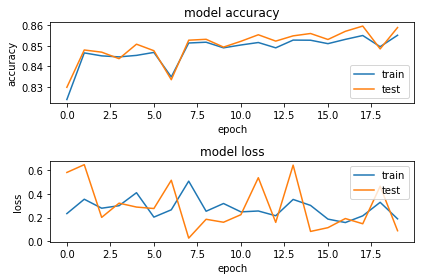

In [16]:
#Plotting the metrics
fig = plt.figure()
#printing training accuracy and testing accuracy
plt.subplot(2,1,1)
plt.plot(tracc)
plt.plot(teacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
#printing training loss and test loss
plt.subplot(2,1,2)
plt.plot(trainingloss)
plt.plot(testlosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

#### WRITE UP


## 1. Training and testing accuracy vs epoch plots
We see the following training and testing accuracy vs epoch plots:
<br>Model 1
<br>Extremely simple model having 3 fully connected layers with ReLU activations and last fully connected layer having sigmoid activation was used. Binary cross-entropy loss and SGD optimizer gives the best result. The tarining accuracy and loss achieved is 85.0601% and 0.36676 while, test accuracy and loss reaches 84.99% and 0.353. This was run for a mere 20 epochs with batch size of 100 with a learning rate of 0.03 and no momentum. Plot for the same is shown below:
<br>Accuracy Plot and Loss Plot
<br><img src="plot1.png">
<br>
<br>Model 2
<br>The same model, with momentum of 0.5 and slower learning rate of 0.003 gave a smoother curve as shown by the plot for the same is shown below:
<br>Accuracy Plot and Loss Plot
<br><img src="plot2.png">

<br>Plot 3
Here, we achieve an accuracy on training and testing data as 85.51% nad 85.58% respectively and training and testing loss as 0.33 and 0.088 respectively.

<br>Accuracy Plot and Loss Plot
<br><img src="plot3.png">


## 2. Representative of the weight and biases
Default initial weights: 

[-0.0846,  0.0737, -0.1119,  ..., -0.0183, -0.0878,  0.0481], ..., [-0.0582,  0.0329, -0.0032,  ...,  0.0696,  0.1196, -0.0903]

Default initial biases: 

[ 0.0257,  0.1132, -0.0846,  0.1110,  0.0072, -0.0392, -0.0697, -0.1130, ..., -0.1096, -0.0610,  0.0603,  0.0334, -0.0882, -0.0887,  0.0756, -0.0302]

<br>The initialization of the weights happens as follows: Weights are initialised within the range [-stdv, stdv] where, stdv = 1. / math.sqrt(self.weight.size(1)) and if the bias is not None, then it is initialised within the same range. 
<br>It is beneficial to use small value for bias and hence, bias = True is included, but its more commonly used to have 0 biases.


## 3. What is used and why
4.1 Initial Shape
<br>The Adult dataset consists of 45222 records having 67 features which include "age", "type_employer", "fnlwgt", "education", "education_num","marital", "occupation", "relationship", "race","sex", "capital_gain", "capital_loss", "hr_per_week","country", "income".
<br>Removal of unnecessary columns like the "fnlwgt" column is performed in the preprocessing and aggregation of living places to countries is performed to lessen the deviation. Also, splitting these columns into their corresponding parts makes it easier to assign labels in 0's and 1's and hence, the features are increased to 67, making us train more on the individual factors.
<br>Then, splitting of training data and test data is done. This splitting is done as 75%-25% for training data and testing data respectively which is the default. 

<br>4.2 Transforming or preprocessing the data
<br>A normalisation of 0.5, 0.5, 0.5 is applied to the data, as the data is seen to be scattered. This makes sure of centralizing the data to avoid very large differences in gradients and hence learnt weights which would cause deviation.

## 4. About network's shape and layer choices, loss function and activation function
### 4.1 Network's shape
As the data is textual, even if it is alot of records, it is small enough to be trained by smaller and simpler model works. Model trained consists of 3 fully connected layers ReLU activation and lastly with sigmoid activation.
<br>The shape of the input is (33916, 67), that is 33916 records having 67 features each.
<br>The first fully conneted layer will take input equal to number of features that is 67. This is worked on by ReLU further, to preserve the learnt weights and not make it zero.
<br>Followed by another fully connected layer with features increased to 200 adn ReLU again.
<br>Final fully connected layer has 1 output neuron over which sigmoid activation function is applied.
<br>This is a simple connected layers perform the job of classification well. 

<br><br>Another, deeper CNN is also modeled having 4 fully connected layers with 32, 16, 8 and 6 filters and relu activation are used to learn features. Finally, sigmoid actiavtion fully connected layer is used for classification.

### 4.2 Layer Choice
<br><br>4.2.1 Fully connected layers
<br>This layer takes all 67 features and learns from all of them to change the weights and biases to get a binary classification of adult makes more than 50K or not.
<br><br>4.2.2 SGD Optimizer
<br>As simple regression model performed the best, it uses the SGD optimizer to give the results.
<br><br>4.2.3 Adam Optimizer
<br>This is the optimization algorithm used to handle sparse gradients if they occur during training.
<br><br>4.2.4 Learning Rate
<br>Slower learning rate gives smoother increase in accuracy over faster learning rate as can be seen in the plot.
<br><br>4.2.5 Momentum
<br>Momentum is the factor between 0 and 1 that increases the step size to come out of local minimas and reach the global minima. A momentum factor of 0.5 gave a smoother curve as seen in plot 2.


### 4.3 Loss Function:
Binary Cross Entropy Loss is used as the loss function as, classification has to be done for only 2 classes. Cross Entropy Loss is used to calculate loss error between real values and predicted values.

### 4.4 Activation Function:
4.4.1 ReLU
<br>Used as activation function in the CNN layer as it is the most widely used because it reduces training time and prevents problem of vanishing gradients. This can be understood by its formula; f(x)=max(0, x) where x is input. So, it sets all negative values in input matrix to 0 while keeping other values as is.
<br><br>4.4.2 Sigmoid Activation
<br>Sigmoid is a special case of softmax activation. Its a case of having 2 outputs, but one of them has all weights equal to zero and so its output will always be zero. So, for binary classification as in our case where we want to see whether the adult earns >50k or not, its a case of binary classification and hence, instead of using softmax with two output units, we simply use sigmoid having one output unit to make less computations and parameters making updates faster.

### 4.5 Splitting Dataset
The dataset is supposed to be technically divided into a 67%-33%; training and testing data because it is widely performed and most efficient. But, here, the default split is used, as 75%-25%.

### 4.6 Datapoints that failed
From the results shown above the number of records that predict incorrectly that income is greater than 50K is 1390 while, number of records that incorrectly predict that income is less than 50K while actually it is more are 3580. A few samples are:

<br>index prediction actual
<br>33869 1 0
<br>33875 1 0
<br>33881 1 0
<br>33895 0 1
<br>33896 1 0
<br>33902 0 1
<br>33913 1 0

This shows that there are more predictions about less income when actually the person has more income. So, our dataset is skewed to people having less income and hence, learning isn't happening fairly.
